<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Clasificación con Python</font></h1>


En este cuaderno trataremos de practicar todos los algoritmos de clasificación aprendidos durante el curso.

Cargaremos un conjunto de datos mediante la librería Pandas, aplicaremos los siguientes algoritmos y encontraremos el mejor para este conjunto en específico con métodos precisos de evaluación.

Cargemos primero las librerías necesarias:


In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Acerca del conjunto de datos


Este conjunto de datos trata sobre el desempeño de diversos equipos de baloncesto. El conjunto **cbb.csv** incluye información sobre el desempeño de 354 equipos a lo largo de cinco temporadas. Contiene los siguientes campos de información:

| Campo      | Descripción                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| ---------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| TEAM       | El equipo escolar de baloncesto de División I                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| CONF       | Conferencia Deportiva en la que participa la escuela (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference) |
| G          | Número de partidos jugados                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| W          | Número de partidos ganados                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| ADJOE      | Adjusted Offensive Efficiency / Eficiencia Ofensiva (Una estimación de la eficiencia ofensiva (puntos anotados por cada 100 posesiones) que un equipo tendría respecto al promedio defensivo de la División I)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ADJDE      | Adjusted Defensive Efficiency / Eficiencia Defensiva (Una estimación de la eficiencia defensiva (puntos permitidos por cada 100 posesiones) que un equipo tendría respecto al promedio ofensivo de la División I)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BARTHAG    | Power Rating / Clasificación (La oportunidad de superar el promedio de un equipo de la División I)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EFG_O      | Porcentaje de Efectividad de Tiro                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EFG_D      | Porcentaje de Efectividad Permitido                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| TOR        | Porcentaje de Rotación Permitido (Clasificación de Rotación)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| TORD       | Porcentaje de Rotación Ejecutado (Steal Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ORB        | Porcentaje de Rebote Ofensivo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| DRB        | Porcentaje de Rebote Defensivo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| FTR        | Tasa de Tiro Libre (Que tan a menudo el equipo realiza tiros libres)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| FTRD       | Tasa de Tiro Libre Permitido                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| 2P_O       | Porcentaje de Tiros de Dos Puntos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| 2P_D       | Porcentaje de Tiros de Dos Puntos Permitidos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| 3P_O       | Porcentaje de Tiros de Tres Puntos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| 3P_D       | Porcentaje de Tiros de Tres Puntos Permitidos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ADJ_T      | Tempo Ajustado (Estimación del tempo (posesiones por cada 40 minutos) que un equipo tendría respecto aquel equipo que quisiera juagar con el tempo promedio de la División I)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| WAB        | Victorias sobre Burbuja (La burbuja se refiere al corte entre lograr el NCAA March Madness Tournament y no)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| POSTSEASON | Ronda donde el equipo fue eliminado o donde finalizó su temporada (R68 = Primeros Cuatro, R64 = Ronda de 64, R32 = Ronda de 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Ultimos Cuatro, 2ND = Subcampeón, Champion = Ganador del NCAA March Madness Tournament de ese año)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| SEED       | Semilla del NCAA March Madness Tournament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| YEAR       | Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |


### Cargar datos desde el archivo CSV


Cargemo el conjunto de datos [NB Necesita dar el enlace hacia el archivo csv]


In [6]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [7]:
df.shape

(1406, 24)

## Añadir Columna

A continuación añadiremos una columna que mostrará "true" si las victorias sobre la burbuja superan las 7 y "false" si no. Nombraremos esta columna Win Index o "windex" para abreviar.


In [8]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Visualización de los Datos y pre procesamiento


Después filtraremos los equipos dentro del conjunto de datos que lograrón un "Sweet Sixteen", "Elite Eight" y "Final Four". Generaremos además un nuevo dataframe que mantendra los valores de la nueva columna.


In [9]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [10]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 equipos alcanzarón a llegar a Sweet Sixteen, 16 a Elite Eight y 8 a Final Four a lo largo de 5 temporadas.


Grafiquemos algunas columnas para entender mejor la información:


In [11]:
# observación: la instalación de seaborn podría tomar algunos minutos.
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



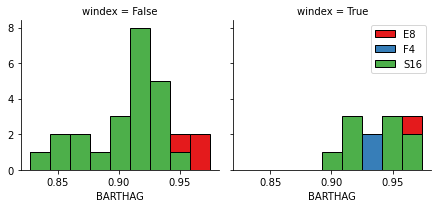

In [13]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

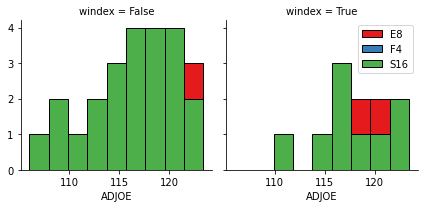

In [14]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre procesamiento: selección/extracción de características


### Veamos como se grafica el valor Adjusted Defense Efficiency ( Eficiencia Defensiva)


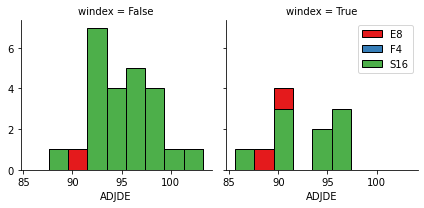

In [15]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


Observamos que estos datos no impactan en la habilidad de un equipo de poder alcanzar Final Four.


## Convertir características categóricas en valores numéricos


Veamos la post temporada: 


In [16]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

El 13% de los equipos con 6 o menos victorias sobre la burbuja llegaron a Final Four mientra que el 17% con 7 o mas lo hicierón.


Transformemos las victorias sobre la burbuja (winindex) abajo de 7 hasta 0 y arriba de 7 hasta 1:


In [17]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

C:\Users\David Mora Salazar\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Selección de característica


Definamos los conjuntos de características, X:


In [18]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


¿Cuales son nuestras etiquetas? Rondas donde el equipo fue eliminado o donde finalizó su temporada (R68 = Primeros Cuatro, R64 = Ronda de 64, R32 = Ronda de 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Ultimos Cuatro, 2ND = Subcampeón, Champion = Ganador del NCAA March Madness Tournament de ese año)


In [19]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Datos Normalizados


La estandarización de los datos le da a estos una media de cero y varianza con valor de la unidad (tecnicamente debería hacerse despues de la división entre grupos de prueba y entrenamiento)


Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
Well, the idea is simple. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias.
The value of the z-score tells you how many standard deviations you are away from the mean. If a z-score is equal to 0, it is on the mean.

A positive z-score indicates the raw score is higher than the mean average. For example, if a z-score is equal to +1, it is 1 standard deviation above the mean.

A negative z-score reveals the raw score is below the mean average. For example, if a z-score is equal to -2, it is 2 standard deviations below the mean. https://www.simplypsychology.org/z-score.html

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Entrenamiento y Validación


Dividir el conjunto entre datos de entrenamiento y validación.


In [21]:
# Dividir X entre entrenamiento y prueba para encontrar el mejor valor de k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Clasificación


Ahora es su turno, utilice el conjunto de entrenamiento para construir un modelo preciso. Despues use el conjunto de validación para reportar la precisión del modelo. 
Deberá utilizar el siguiente algoritmo:

-   K Nearest Neighbor(KNN)
-   Arbol de Decisión
-   Maquina de Soporte Vectorial (SVM) 
-   Regresión Logística


# K Nearest Neighbor(KNN)

<b>Pregunta  1 </b> Construya un modelo KNN donde k sea igual a cinco, encuentre la precisión de los datos de validación (X_val y y_val)


Puede utilizar <code> accuracy_score</cdoe>


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### Entrenamiento

Comencemos con el algoritmo con k=4 por ahora:

In [23]:
k = 5
#Entrenar el Modelo y Predecir  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

### Predicción
podemos utilizar el modelo para predecir el set de prueba:

In [25]:
yhat = neigh.predict(X_val)
yhat[0:5]

array(['S16', 'S16', 'S16', 'E8', 'E8'], dtype=object)

<b>Pregunta  2</b> Determine e imprima la precisión para los primeros 15 valores de k en los datos de validación:


### Evaluación de certeza
En clasificación multietiqueta, la función __classification accuracy score__ computa la certeza del subconjunto. Esta función es igual a la función jaccard_similarity_score. Básicamente, calcula cómo se relacionan las etiquetas actuales con las etiquetas predichas dentro del set de pruebas.

In [26]:
from sklearn import metrics
print("Entrenar el set de Certeza: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Probar el set de Certeza: ", metrics.accuracy_score(y_val, yhat))

Entrenar el set de Certeza:  0.6363636363636364
Probar el set de Certeza:  0.6666666666666666


K en KNN, es el número de los vecinos más cercanos para examinar. Se supone que el Usuario lo indique. Por lo tanto, ¿cómo elegimos el correcto K?
La solución general es reservar una parte de los datos para probaar la certeza del modelo. Luego, elegimos k =1, lo utilizamos como parte del entrenamiento para modelar, y calculamos la certeza de la predicción utilizando todas las muestras del set de pruebas. Repetir este proceso, aumentando el k, y viendo luego, cual es el mejor k para el modelo.

Podemos calcular la certeza de KNN para diferentes Ks.

In [27]:
Ks = 16
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Entrenar el Modelo y Predecir  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score(y_val, yhat)

    
    std_acc[n-1]=np.std(yhat==y_val)/np.sqrt(yhat.shape[0])

mean_acc

array([0.33333333, 0.33333333, 0.5       , 0.58333333, 0.66666667,
       0.58333333, 0.58333333, 0.66666667, 0.58333333, 0.58333333,
       0.58333333, 0.5       , 0.58333333, 0.58333333, 0.58333333])

#### Dibujo de la certeza del modelo para diferentes números de vecinos

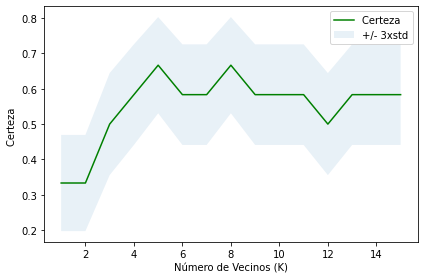

In [28]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "La mejor aproximación de certeza fue con ", mean_acc.max(), "con k=", mean_acc.argmax()+1) 

La mejor aproximación de certeza fue con  0.6666666666666666 con k= 5


# Arbol de Decisión


Las siguientes líneas de código se ajustan en <code>DecisionTreeClassifier</code>:


In [30]:
from sklearn.tree import DecisionTreeClassifier

<b>Pregunta  3</b> Determine el valor mínimo para el parámetro <code>max_depth</code> que mejora los resultados


In [31]:
BalTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
BalTree # muestra los parámetros por omisión

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
BalTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Predicción
Ahora hagamos algunas <b>predicciones</b> en el dataset de pruebas y guardémoslas en una variable llamada <b>predTree</b>.

In [34]:
predTree = BalTree.predict(X_val)

Puedes imprimir <b>predTree</b> y <b>y_testset</b> si quieres comparar visualmente la predicción con los valores actuales.

In [35]:
print (predTree [0:5])
print (y_val [0:5])

['S16' 'S16' 'E8' 'E8' 'S16']
['F4' 'S16' 'S16' 'S16' 'S16']


## Evaluación
Luego, importemos __metrics__ de sklearn y revisemos la precisión de nuestro modelo.

In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precisión de los Arboles de Decisión: ", metrics.accuracy_score(y_val, predTree))

Precisión de los Arboles de Decisión:  0.3333333333333333


Se analiza el número de de max_depth que maximiza la precisión de los resultados.

In [40]:
Ks = 16
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Entrenar el Modelo y Predecir 
    BalTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    BalTree.fit(X_train,y_train)
    predTree = BalTree.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score(y_val, predTree)
    std_acc[n-1]=np.std(predTree==y_val)/np.sqrt(predTree.shape[0])

mean_acc

array([0.66666667, 0.66666667, 0.5       , 0.33333333, 0.41666667,
       0.5       , 0.41666667, 0.5       , 0.5       , 0.5       ,
       0.41666667, 0.41666667, 0.41666667, 0.41666667, 0.5       ])

#### Dibujo de la certeza del modelo para diferentes números de max depth

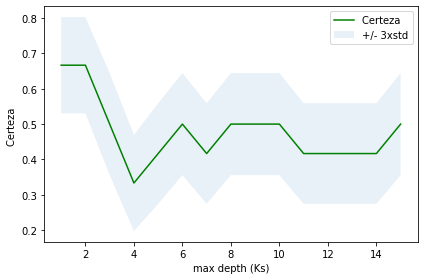

In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('max depth (Ks)')
plt.tight_layout()
plt.show()

## Visualización
Observemos el árbol

In [44]:
!pip install six

In [48]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=332bd2fb7d6395cc7afbdc5aef3596b8d8eda36ce30d896f98e4fffa570ede46
  Stored in directory: c:\users\david mora salazar\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [55]:
!pip install graphviz

In [49]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [56]:
dot_data = StringIO()
filename = "BalTree.png"
featureNames = df1.columns[0:21]
targetNames = df1['POSTSEASON'].unique().tolist()
out=tree.export_graphviz(BalTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_val), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

InvocationException: GraphViz's executables not found

# Maquina de Soporte Vectorial (SVM)


<b>Pregunta  4</b> Entrene el modelo Maquina de Soporte Vectorial y determine la precisión de los datos de validación de cada nucleo. Encuentre el nucleo ((linear, poly, rbf, sigmoid) que otorge la mejor puntuación para los datos y entrene un SVM con el.


In [57]:
from sklearn import svm

In [58]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [66]:
yhat = clf.predict(X_val)
yhat [0:5]

array(['S16', 'S16', 'S16', 'S16', 'E8'], dtype=object)

## Evaluación

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

C:\Users\David Mora Salazar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\David Mora Salazar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\David Mora Salazar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          E8       0.00      0.00      0.00         2
          F4       0.00      0.00      0.00         2
         S16       0.64      0.88      0.74         8

    accuracy                           0.58        12
   macro avg       0.21      0.29      0.25        12
weighted avg       0.42      0.58      0.49        12

Matriz de confusión, sin normalización
[[7 1 0]
 [2 0 0]
 [2 0 0]]


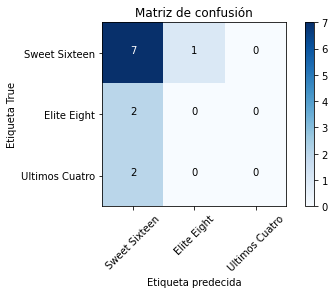

In [81]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_val, yhat, labels=["S16","E8","F4"])
np.set_printoptions(precision=2)

print (classification_report(y_val, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sweet Sixteen','Elite Eight','Ultimos Cuatro'],normalize= False,  title='Matriz de confusión')

# Regresión Logística


<b>Pregunta 5</b> Entrene un modelo de regresión logística y determine la precisión de los datos de validación (set C=0.01)


In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Ahora, podremos predecir usando nuestro set de prueba:

In [88]:
yhat = LR.predict(X_val)
yhat

array(['F4', 'S16', 'E8', 'E8', 'E8', 'E8', 'S16', 'F4', 'E8', 'S16',
       'S16', 'S16'], dtype=object)

__predict_proba__  devuelve estimaciones para todas las clases. La primer columna es la probabilidad de la clase 1, P(Y=1|X), y la segunda columna es la probabilidad de la clase 0, P(Y=0|X):

In [89]:
yhat_prob = LR.predict_proba(X_val)
yhat_prob

array([[0.31, 0.36, 0.33],
       [0.33, 0.33, 0.35],
       [0.36, 0.31, 0.33],
       [0.39, 0.35, 0.26],
       [0.35, 0.33, 0.32],
       [0.34, 0.32, 0.34],
       [0.32, 0.34, 0.34],
       [0.33, 0.35, 0.33],
       [0.35, 0.32, 0.33],
       [0.32, 0.31, 0.37],
       [0.34, 0.3 , 0.35],
       [0.33, 0.29, 0.37]])

## Evaluación
### índice jaccard
Probemos con el índice jaccard para la evaluación de precisión. Podemos definir como jaccard al tamaño de la intersección dividida por el tamaño de la unión de dos set de etiquetas. Si todo el set de etiquetas de muestra predichas coinciden con el set real de etiquetas, entonces la precisión es 1.0; sino, sería 0.0.


In [102]:
from sklearn.metrics import jaccard_score
jaccard_score(y_val, yhat, average='micro')

0.4117647058823529

### Matriz de confusión
Otra forma de mirar la precisión del clasificador es ver la __matriz de confusión__.

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función muestra y dibuja la matriz de confusión.
    La normalización se puede aplicar estableciendo el valor `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
print(confusion_matrix(y_val, yhat, labels=["S16","E8","F4"]))

[[4 4 0]
 [1 1 0]
 [0 0 2]]


Matriz de confusión sin normalización
[[4 4 0]
 [1 1 0]
 [0 0 2]]


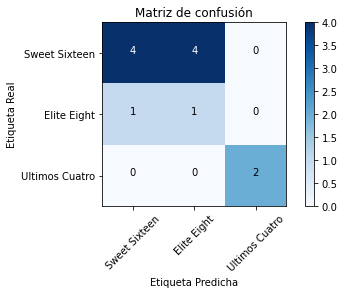

In [107]:
# Calcular la matriz de confusión
cnf_matrix = confusion_matrix(y_val, yhat, labels=["S16","E8","F4"])
np.set_printoptions(precision=2)


# Dibujar la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sweet Sixteen','Elite Eight','Ultimos Cuatro'],normalize= False,  title='Matriz de confusión')

In [108]:
print (classification_report(y_val, yhat))

              precision    recall  f1-score   support

          E8       0.20      0.50      0.29         2
          F4       1.00      1.00      1.00         2
         S16       0.80      0.50      0.62         8

    accuracy                           0.58        12
   macro avg       0.67      0.67      0.63        12
weighted avg       0.73      0.58      0.62        12



# Evaluación del Modelo con el Conjunto de Prueba


In [109]:
from sklearn.metrics import f1_score
# para f1_score establezca el promedio del parámetro en 'micro'
from sklearn.metrics import log_loss

In [110]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Pregunta  5</b> Calcule la puntuación de F1 y de la medida de Jaccard para cada modelo de arriba. Utilice el hiper parámetro de mejor desempeño para los datos de validación. **para f1_score establezca el promedio del parámetro en 'micro'.**


### Cargar el conjunto de prueba para la evaluación


In [112]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [113]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

C:\Users\David Mora Salazar\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array([[-4.08e-01, -1.10e+00,  3.37e-01,  2.66e+00, -2.47e+00,  2.14e-01,
         9.44e-01, -1.19e+00, -1.64e+00,  1.45e-02,  1.30e+00, -6.24e-01,
        -9.32e-01,  1.43e-01,  1.69e-01,  2.85e-01,  1.63e+00, -8.37e-01,
        -9.99e-01,  4.84e-01, -6.77e-01],
       [ 3.64e-01,  3.26e-01,  7.03e-01, -7.14e-01,  1.07e+00,  4.83e-01,
         4.77e-01, -1.33e+00, -6.86e-02, -7.35e-01, -1.35e+00, -8.07e-01,
         3.42e-01,  4.97e-02,  9.41e-02,  1.37e+00,  6.94e-01, -2.01e+00,
         9.81e-01, -1.19e+00,  1.48e+00],
       [ 3.64e-01,  1.18e+00,  9.32e-01, -8.79e-01,  1.24e+00,  7.85e-01,
        -9.22e-01,  5.28e-01, -1.87e-01, -1.19e-01, -3.18e-01,  6.82e-01,
         1.01e+00,  8.07e-02, -9.91e-01,  1.75e+00, -2.39e-01,  6.61e-01,
         1.92e+00, -1.19e+00,  1.48e+00],
       [ 3.64e-01,  6.12e-01,  3.60e-01,  7.15e-01, -8.92e-02, -3.58e-01,
         6.90e-01, -6.42e-01,  4.83e-01,  3.90e-01,  6.81e-01,  1.07e+00,
         1.01e-01,  4.97e-02,  1.92e-02, -8.41e-01,  1.33e+0

In [28]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

Para el cálculo de cada índice, se toma el mejor hiper parámetro para cada modelo y se evalúa para conocer cuál modelo logra la mejor precisión. Este análisis se realiza en otro documento.

KNN


In [ ]:
jaccard_index(predictions, true)
f1_score(y_true, y_pred, average='micro')

Arbol de Decisión


In [ ]:
jaccard_index(predictions, true)
f1_score(y_true, y_pred, average='micro')

SVM


In [ ]:
jaccard_index(predictions, true)
f1_score(y_true, y_pred, average='micro')

Regresión Logistica


In [ ]:
jaccard_index(predictions, true)
f1_score(y_true, y_pred, average='micro')

# Reporte

Deberá reportar la precisión del modelo utilizando distintas métricas de evaluación:


| Algoritmo           | Precisión | Jaccard  | F1       | LogLoss |
| ------------------- | --------- | -------- | -------- | ------- |
| KNN                 | 0.628571  | 0.458333 | 0.628571 | NA      |
| Arbol de Decisión   | 0.642857  | 0.473684 | 0.642857 | NA      |
| SVM                 | 0.685714  | 0.521739 | 0.685714 | NA      |
| Regresión Logística | 0.685714  | 0.521739 | 0.685714 | 1.03719 |


Algo a tener en cuenta cuando se crean modelos para predecir los resultados en torneos de baloncesto o deportes en general es su dificultad debido a la gran cantidad de factores que influyen en el juego. Incluso en deportes de apuestas, una precisión del 55% o mas se considera buena debido a que indica ganancias.


<h2>¿Quiere aprender mas?</h2>

IBM SPSS Modeler es una plataforma para el análisis que contiene muchos algoritmos de aprendizaje automático (machine learning). Ha sido diseñado con el fin de ofrecer predicciones inteligentes a las decisiones hechas por personas, grupos, sistemas - con la compañia como un todo. Una prueba gratuita esta disponible a traves de este curso desde aqui: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Además, puede utilizar Watson Studio para ejecutar estos cuardernos mas rápido y con conjuntos de datos mas grandes. Watson Studio es la solución líder de IBM en la nube para científicos de datos, contruido por científicos de datos. Con los cuadernos de Jupyter, RStudio, Apache Spark y librerías pre instaladas en la nube, Watson Studio permite a los científicos de datos colaborar en sus proyectos sin necesidad de instalar nada. Unase a la gran comunidad de usuarios de Watson Studio hoy con un cuenta gratuita en <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>


<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>
